In [104]:
#The entire Image Processing Program was written, documented and improvised by 
#Sheekar Banerjee (A.I. Research Engineer, Cisscom LLC, USA)

#installing dependencies
!pip install easyocr
!pip install imutils

In [105]:
#importing libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

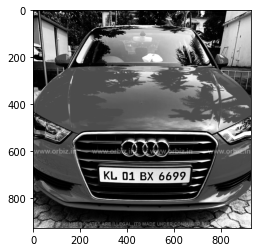

In [106]:
#reading the image, converting to grayscale
img = cv2.imread('car plate6.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

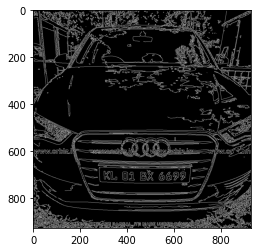

In [107]:
#filtering and detecting edges
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [108]:
#finding and srting the contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [109]:
#tracking the edges and the contours
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [110]:
location

array([[[280, 671]],

       [[286, 729]],

       [[657, 733]],

       [[670, 676]]], dtype=int32)

In [111]:
#masking the location of contour of the number plate
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

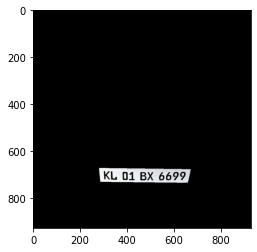

In [112]:
#Plotting the masked number plate with matplotlib 
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [113]:
#Cropping the masked number plate from the image
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

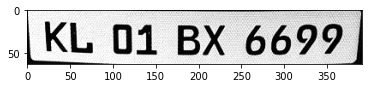

In [114]:
#Plotting the cropped section of the number plate
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [115]:
# Rendering and applying OCR with read the characters from the number plate
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[16, 6], [82, 6], [82, 56], [16, 56]], 'KL', 0.9997402167101802),
 ([[94, 10], [156, 10], [156, 58], [94, 58]], '01', 0.998173338855509),
 ([[170, 8], [374, 8], [374, 60], [170, 60]], 'BX 6699', 0.9997189224504842)]

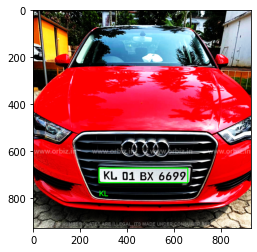

In [117]:
#Automated Number Plate Recognition (ANPR) in Real Time
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))